E(alpha):
[0.51275954 0.50321358 0.5        0.50184902 0.50694301]

var(E)
[0.0254076  0.00558704 0.         0.00469972 0.01718867]

Acceptance rate : 0.854662


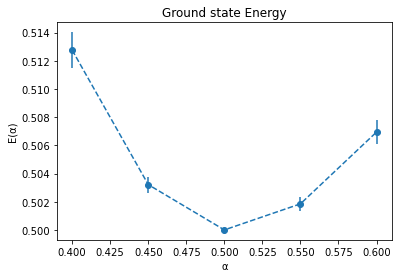

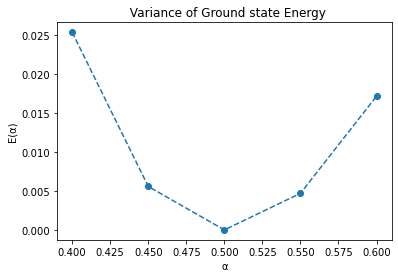

time taken for simulation :2.98477840423584


In [1]:
import numpy as np
import time

from Functions.metropolis import *
from Functions.errorcalc import *
from Functions.plot_figures import *
import Systems.HarmonicOscillator  as Oscillator
import Systems.Hatom as Hydrogen
import Systems.Helium as Helium

""" This file will preform a monte carlo integration to get the ground state energy of a given system.
    It will do this for varying system parameter alpha. It will show the plot of the Energy and the variance for
    alphas as given bij jos Thijsen. The Systems that can be simulated are:
    
                                                                        - Harmonic Oscillator
                                                                        - Hydrogen atom
                                                                        - Helium atom
    See below for simulation parameters.
"""

start_time = time.time()


def VMC(N_walkers, N_tries, System, plot_setting):
    alpha = System.alpha_jos
    D = System.dimension

    E_a = np.zeros(len(alpha))
    E_var = np.zeros(len(alpha))
    E_error = np.zeros(len(alpha))

    for i in range(len(alpha)):
        f = lambda R: System.trial_wave_function(alpha[i],  R)

        rn, accept_rate = metropolis_algorithm(f, N_tries, N_walkers, D)
        E = System.E_loc(alpha[i], rn)
        E_a[i] = np.mean(E)
        E_error[i], E_var[i] = data_blocking_error(E[:,0], block_size = 6000)

    print("E(alpha):")
    print(E_a)
    print()
    print("var(E)")
    print(E_var)
    print()
    print(f"Acceptance rate : {accept_rate}")

    if plots == True:
        plot_energy(alpha, E_a, E_error, plotsave)
        plot_variance(alpha, E_var, plotsave)

# Simulation parameters
System = Oscillator
N_tries = 10000
N_walkers = 50

# plot settings
plots = True
plotsave = False
plot_setting = [plots, plotsave]

VMC(N_walkers, N_tries, System, plot_setting)

elapsed_time = time.time() - start_time
print(f"time taken for simulation :{elapsed_time}")
